# `There are 3 main regex functions in Pyspark.
1) regexp_extract - regexp_extract function in PySpark, regular expressions are used to define the pattern that will be searched for in a given string.
The regular expression pattern is specified as the first parameter of the `regexp_extract` function. It can be a string literal or a column reference. The pattern is enclosed within forward slashes (`/`) and can include a combination of characters, metacharacters, and special sequences.

Here are some key concepts to understand about regular expressions in regexp_extract:

Literals: Regular expressions can include literal characters that are matched exactly as they appear. For example, the pattern /abc/ will match the string "abc" in the input.

Metacharacters: Metacharacters have special meanings in regular expressions and are used to define more complex patterns. Some commonly used metacharacters include . (dot), * (asterisk), + (plus), ? (question mark), and | (pipe).

Character Classes: Character classes are used to match a specific set of characters. They are enclosed within square brackets ([]). For example, the pattern /[aeiou]/ will match any vowel character.

Quantifiers: Quantifiers specify the number of occurrences of a character or group. Some commonly used quantifiers include {n}, {n,}, and {n,m}.

Anchors: Anchors are used to match a specific position within the string. Some commonly used anchors include ^ (caret), $ (dollar sign), and \b (word boundary).

Grouping and Capturing: Parentheses () are used to group characters or expressions together. They also capture the matched substring for further use.

It is important to note that regular expressions can be complex and require careful consideration to ensure accurate pattern matching. Testing and experimenting with different patterns is often necessary to achieve the desired results.

================================
Common use cases and scenarios
================================

+ Data cleaning and validation: Use `regexp_extract` to extract and validate specific patterns within strings, such as email addresses, phone numbers, or URLs.

+ Data transformation: Use `regexp_extract` to transform data by extracting specific information from strings, such as extracting the year, month, and day from a date string.

+ Data enrichment: Use `regexp_extract` to enrich existing data by extracting additional information from strings, such as extracting the product name or category from a text description.

+ Data filtering: Use `regexp_extract` to filter data based on specific patterns or conditions, such as extracting records that match a specific pattern.

+ Data aggregation: Use `regexp_extract` to aggregate data based on specific patterns or conditions, such as counting the occurrences of certain words or phrases within a text corpus.

+ Data exploration and analysis: Use `regexp_extract` to explore and analyze text data by extracting meaningful information, such as extracting hashtags or mentions from social media posts.

+ Data masking and anonymization: Use `regexp_extract` to mask or anonymize sensitive information within strings, such as replacing credit card numbers or social security numbers with masked values.

==========================================================================
Syntax:

regexp_extract(column, pattern, index)
The function takes three parameters:

column: The name of the column or the column expression from which the substring needs to be extracted.

pattern: The regular expression pattern that defines the substring to be extracted. The pattern can be a string or a column expression.

index: The index of the capturing group in the regular expression pattern. If the pattern contains multiple capturing groups, the index parameter specifies which group's match should be extracted. The index starts from 0.


In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_extract

spark = SparkSession.builder.appName('Regular expression').getOrCreate()
spark

In [28]:
from pyspark.sql.functions import regexp_extract

# Create a DataFrame with a string column
data = [("John Doe",), ("Jane Smith",), ("Alice Johnson",), ("Rakesh Rajnath Kanojia",)]
df = spark.createDataFrame(data, ["name"])

first = r'(\w+)'
last = r'(\w+)$'

# Extract the first name using a regular expression pattern
df =    df \
        .withColumn("first_name", regexp_extract("name", first, 0)) \
        .withColumn("Middle_name", regexp_extract("name", r'\s(\w+)\s', 0)) \
        .withColumn("Last_name", regexp_extract("name", last, 1))

df.show(truncate=False)

+----------------------+----------+-----------+---------+
|name                  |first_name|Middle_name|Last_name|
+----------------------+----------+-----------+---------+
|John Doe              |John      |           |Doe      |
|Jane Smith            |Jane      |           |Smith    |
|Alice Johnson         |Alice     |           |Johnson  |
|Rakesh Rajnath Kanojia|Rakesh    | Rajnath   |Kanojia  |
+----------------------+----------+-----------+---------+



In [34]:
from pyspark.sql import Row

data = [
            Row(address = "93 NORTH 9TH STREET, BROOKLYN NY 11211"),
            Row(address = "380 WESTMINSTER ST, PROVIDENCE RI 02903"),
            Row(address = "177 MAIN STREET, LITTLETON NH 03561"),
            Row(address = "202 HARLOW ST, BANGOR ME 04401"),         
            Row(address = "46 FRONT STREET, WATERVILLE, ME 04901"),  
            Row(address = "22 SUSSEX ST, HACKENSACK NJ 07601"),      
            Row(address = "75 OAK STREET, PATCHOGUE NY 11772"),      
            Row(address = "1 CLINTON AVE, ALBANY NY 12207"),         
            Row(address = "7242 ROUTE 9, PLATTSBURGH NY 12901"),
            Row(address = "520 5TH AVE, MCKEESPORT PA 15132"),       
            Row(address = "122 W 3RD STREET, GREENSBURG PA 15601")
        ]

In [35]:
data

[Row(address='93 NORTH 9TH STREET, BROOKLYN NY 11211'),
 Row(address='380 WESTMINSTER ST, PROVIDENCE RI 02903'),
 Row(address='177 MAIN STREET, LITTLETON NH 03561'),
 Row(address='202 HARLOW ST, BANGOR ME 04401'),
 Row(address='46 FRONT STREET, WATERVILLE, ME 04901'),
 Row(address='22 SUSSEX ST, HACKENSACK NJ 07601'),
 Row(address='75 OAK STREET, PATCHOGUE NY 11772'),
 Row(address='1 CLINTON AVE, ALBANY NY 12207'),
 Row(address='7242 ROUTE 9, PLATTSBURGH NY 12901'),
 Row(address='520 5TH AVE, MCKEESPORT PA 15132'),
 Row(address='122 W 3RD STREET, GREENSBURG PA 15601')]

In [38]:
df1 = spark.createDataFrame(data)
df1.printSchema()
df1.show(truncate=False)

root
 |-- address: string (nullable = true)

+---------------------------------------+
|address                                |
+---------------------------------------+
|93 NORTH 9TH STREET, BROOKLYN NY 11211 |
|380 WESTMINSTER ST, PROVIDENCE RI 02903|
|177 MAIN STREET, LITTLETON NH 03561    |
|202 HARLOW ST, BANGOR ME 04401         |
|46 FRONT STREET, WATERVILLE, ME 04901  |
|22 SUSSEX ST, HACKENSACK NJ 07601      |
|75 OAK STREET, PATCHOGUE NY 11772      |
|1 CLINTON AVE, ALBANY NY 12207         |
|7242 ROUTE 9, PLATTSBURGH NY 12901     |
|520 5TH AVE, MCKEESPORT PA 15132       |
|122 W 3RD STREET, GREENSBURG PA 15601  |
+---------------------------------------+



In [63]:
# from these address I want to capture street number,
# City
#state
#zipcode


from pyspark.sql.functions import *

df1 =  df1\
       .withColumn("street_num", regexp_extract(col('address'), r'^(\d+)' ,1))\
       .withColumn("city", regexp_extract(col('address'), r'(,)\s(\w*)' ,2)) \
       .withColumn("State", regexp_extract(col('address'), r'(,)\s(\w*)\s(\w{2})' ,3)) \
       .withColumn("Zip_code", regexp_extract(col('address'), r'(\d{5})$' ,1)) \


df1.show(truncate=False)



+---------------------------------------+----------+-----------+-----+--------+
|address                                |street_num|city       |State|Zip_code|
+---------------------------------------+----------+-----------+-----+--------+
|93 NORTH 9TH STREET, BROOKLYN NY 11211 |93        |BROOKLYN   |NY   |11211   |
|380 WESTMINSTER ST, PROVIDENCE RI 02903|380       |PROVIDENCE |RI   |02903   |
|177 MAIN STREET, LITTLETON NH 03561    |177       |LITTLETON  |NH   |03561   |
|202 HARLOW ST, BANGOR ME 04401         |202       |BANGOR     |ME   |04401   |
|46 FRONT STREET, WATERVILLE, ME 04901  |46        |WATERVILLE |04   |04901   |
|22 SUSSEX ST, HACKENSACK NJ 07601      |22        |HACKENSACK |NJ   |07601   |
|75 OAK STREET, PATCHOGUE NY 11772      |75        |PATCHOGUE  |NY   |11772   |
|1 CLINTON AVE, ALBANY NY 12207         |1         |ALBANY     |NY   |12207   |
|7242 ROUTE 9, PLATTSBURGH NY 12901     |7242      |PLATTSBURGH|NY   |12901   |
|520 5TH AVE, MCKEESPORT PA 15132       

The 'regexp_extract_all' function in PySpark is a powerful tool for extracting multiple occurrences of a pattern from a string column. It is particularly useful when you need to extract multiple matches from a string and store them in an array.

=========================================================
Syntax and Parameters

The regexp_extract_all function in PySpark follows the syntax:

regexp_extract_all(column, pattern, idx=0)
The function takes the following parameters:

column: The name of the column or the column expression from which the pattern needs to be extracted.

pattern: The regular expression pattern that defines the desired pattern to be extracted from the column.

idx (optional): The index of the matching group to extract. By default, it is set to 0, which means the entire matching string will be returned. If the pattern contains capturing groups, you can specify the index of the desired group to extract.

In [64]:
from pyspark.sql.functions import regexp_extract_all

df = spark.createDataFrame([(1, "John's email is john@example.com and Jane's email is jane@example.com")], ["id", "text"])

ImportError: cannot import name 'regexp_extract_all' from 'pyspark.sql.functions' (E:\spark\spark-3.3.0-bin-hadoop3\spark-3.3.0-bin-hadoop3\python\pyspark\sql\functions.py)

In [77]:
from pyspark.sql.functions import regexp_replace

data = [("123abc?&^%","123-345-6790"), ("456def#@","879-345-8907"), ("789ghi.)","568-345-4567")]
df = spark.createDataFrame(data, ["text", "phone_number"])
df.show(truncate=False)

#removing all charatcer other than Alphabet and numbers and then making numbers to *
result_df = df.withColumn("cleaned", regexp_replace("text", '[^a-zA-Z0-9]', ''))\
              .withColumn("masked", regexp_replace("cleaned", "\d", "*"))\
              .withColumn('Phone_num2', regexp_replace('phone_number' , '\d', 'X'))
result_df.show()


+----------+------------+
|text      |phone_number|
+----------+------------+
|123abc?&^%|123-345-6790|
|456def#@  |879-345-8907|
|789ghi.)  |568-345-4567|
+----------+------------+

+----------+------------+-------+------+------------+
|      text|phone_number|cleaned|masked|  Phone_num2|
+----------+------------+-------+------+------------+
|123abc?&^%|123-345-6790| 123abc|***abc|XXX-XXX-XXXX|
|  456def#@|879-345-8907| 456def|***def|XXX-XXX-XXXX|
|  789ghi.)|568-345-4567| 789ghi|***ghi|XXX-XXX-XXXX|
+----------+------------+-------+------+------------+



In [ ]:
# Mathematical Functions

In [80]:
# abs = Returns the absolute value of the given value.

# Sample data
data = [(1,), (-2,), (3,), (-4,)]
df = spark.createDataFrame(data, ["value"])

df = df.withColumn('abs', abs(col('value')))
df.show()

+-----+---+
|value|abs|
+-----+---+
|    1|  1|
|   -2|  2|
|    3|  3|
|   -4|  4|
+-----+---+



In [81]:
#CEIL - Returns the smallest integer greater than or equal to the given value.

# Sample data
data = [(1.1,), (2.5,), (3.7,), (4.0,)]
df = spark.createDataFrame(data, ["value"])

df = df.withColumn('ceil', ceil(col('value')))
df.show()


+-----+----+
|value|ceil|
+-----+----+
|  1.1|   2|
|  2.5|   3|
|  3.7|   4|
|  4.0|   4|
+-----+----+



In [82]:
#Floor - Returns the smallest integer greater than or equal to the given value.

# Sample data
data = [(1.1,), (2.5,), (3.7,), (4.0,)]
df = spark.createDataFrame(data, ["value"])

df = df.withColumn('floor', floor(col('value')))
df.show()


+-----+-----+
|value|floor|
+-----+-----+
|  1.1|    1|
|  2.5|    2|
|  3.7|    3|
|  4.0|    4|
+-----+-----+



In [84]:
#round - Returns the given value rounded to the specified number of decimal places.

# Sample data
data = [(1.11111,), (2.22222,), (3.33333,), (4.44444,)]
df = spark.createDataFrame(data, ["value"])

df = df.withColumn('round2', round(col('value'),2)) \
        .withColumn('round1', round(col('value'),1)) \
        .withColumn('round0', round(col('value'),0)) 

df.show()

+-------+------+------+------+
|  value|round2|round1|round0|
+-------+------+------+------+
|1.11111|  1.11|   1.1|   1.0|
|2.22222|  2.22|   2.2|   2.0|
|3.33333|  3.33|   3.3|   3.0|
|4.44444|  4.44|   4.4|   4.0|
+-------+------+------+------+



#exp 
he exponential function, often denoted as "exp(x)" or "e^x," is a mathematical function that describes the growth or decay of a quantity over time. In the context of PySpark or any programming environment, the exp function is used to calculate the exponential value of a given numeric expression.

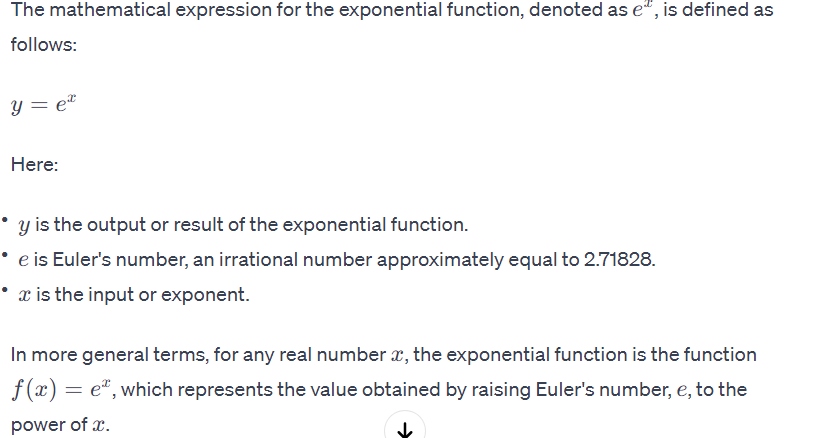



In [89]:
# Sample data
data = [(1,), (2,), (3,), (4,)]
df = spark.createDataFrame(data, ["value"])

# Apply exp function on "value" column
df = df\
        .withColumn('exp', exp(col('value')))\
        .withColumn('exp1', pow(2.71828,col('value')))
        
df.show()

+-----+------------------+------------------+
|value|               exp|              exp1|
+-----+------------------+------------------+
|    1|2.7182818284590455|           2.71828|
|    2|  7.38905609893065|      7.3890461584|
|    3|20.085536923187668|20.085496391455553|
|    4|54.598150033144236|  54.5980031309658|
+-----+------------------+------------------+



# LOG
The logarithm function, often denoted as 
log
⁡
log, is a mathematical function that represents the exponent to which a specific base must be raised to obtain a given number. In PySpark or any programming context, the log function is used to calculate the logarithm of a specified numeric expression.

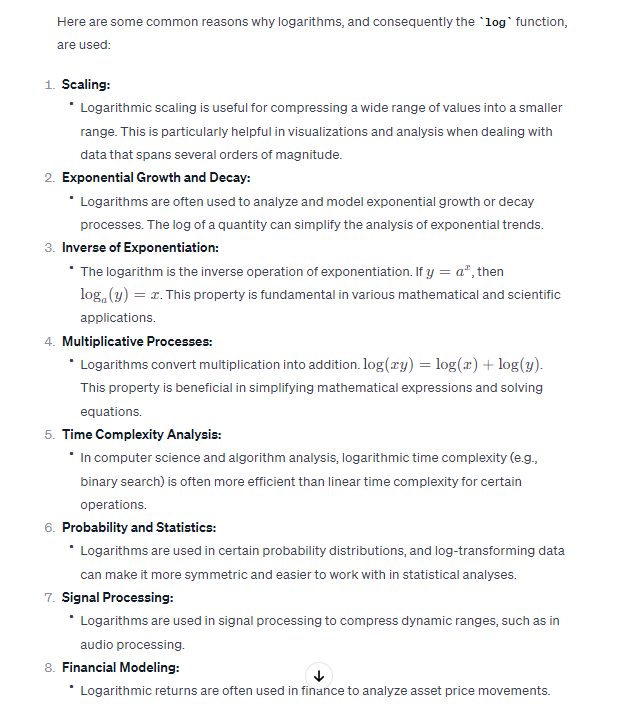


In [90]:
# Sample data
data = [(1,), (2,), (3,), (4,)]
df = spark.createDataFrame(data, ["value"])

df.withColumn('log', log(col('value')))
df.show()

+-----+
|value|
+-----+
|    1|
|    2|
|    3|
|    4|
+-----+



#SQUARE ROOT

Taking the square root is a common technique used to bring numbers that are on a squared scale back to the original scale. This is particularly relevant in the context of error metrics like the root mean square error (RMSE) or mean squared error (MSE). Here's why taking the square root is important for making large numbers in a proper scale:

Scaling of Errors:
==============
Squaring errors in MSE or RMSE has the effect of scaling up larger errors. If there are outliers or larger errors in the data, squaring them can result in disproportionately large values in the mean squared error.

Magnitude Reduction:
==================
Taking the square root of the mean squared error reduces the magnitude of the error metric. This is important for obtaining a more interpretable and understandable measure of the average error.

Interpretability:
=============
The square root ensures that the RMSE is expressed in the original units of the response variable, making it directly interpretable. Without the square root, the metric would be in squared units, which might not have a meaningful interpretation in the context of the problem.

Consistency with RMS Notation:
===========================
The square root aligns with the concept of root mean square (RMS) calculations, which involve taking the square root of the mean of squared values. This consistency is maintained in statistical norms.

Mitigating Influence of Outliers:
==========================
Squaring tends to magnify the influence of outliers. Taking the square root helps mitigate this influence and provides a more balanced measure of error that is less sensitive to extreme values.
Here's the formula for RMSE to illustrate the square root operation:


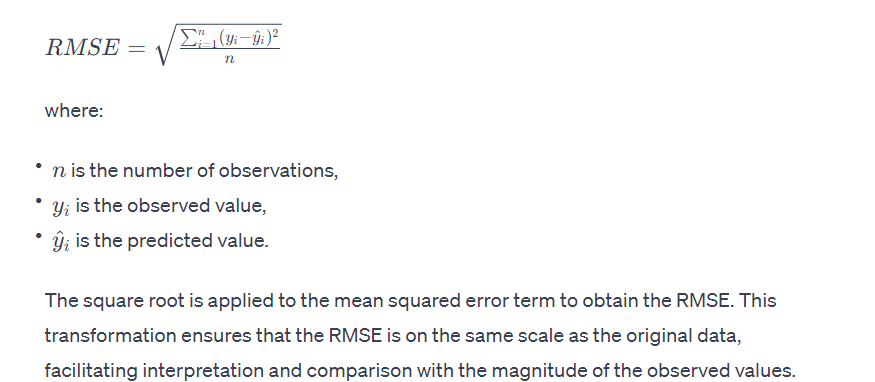

In [91]:
# Sample data
data = [(1,), (4,), (9,), (16,)]
df = spark.createDataFrame(data, ["value"])

# Apply sqrt function on "value" column
df.select(sqrt(df["value"])).show()


+-----------+
|SQRT(value)|
+-----------+
|        1.0|
|        2.0|
|        3.0|
|        4.0|
+-----------+



#POW

After applying the 'pow' function in PySpark, you obtain a new column that contains the result of raising a specified base to a specified exponent for each row in the DataFrame. The conclusions you can draw depend on the context of your data and the specific values used for the base and exponent. Here are some general observations:

Exponential Growth or Decay:
=============================
#) If the base is greater than 1, the result represents exponential growth. The larger the exponent, the more significant the growth.
#) If the base is between 0 and 1, the result represents exponential decay. The larger the exponent, the slower the decay.

Magnitude of Results:
==================
#) Observe the magnitude of the results. Large exponents can lead to very large or very small values, indicating strong growth or decay.

Comparison of Exponentiated Values:
================================
#) Compare the exponentiated values across different rows to understand relative growth or decay rates.


In [94]:
# Sample data
data = [(2, 3), (4, 2), (3, 4), (5, 2)]
df = spark.createDataFrame(data, ["value", "exponent"])

# Apply pow function on "value" and "exponent" columns
df.select('value', "exponent", pow(df["value"], df["exponent"])).show()

+-----+--------+----------------------+
|value|exponent|POWER(value, exponent)|
+-----+--------+----------------------+
|    2|       3|                   8.0|
|    4|       2|                  16.0|
|    3|       4|                  81.0|
|    5|       2|                  25.0|
+-----+--------+----------------------+

